In [1]:
# 1D toy example of the improved Wasserstein GAN by Gulrajani et al., 2017, https://arxiv.org/abs/1704.00028
# based on the blog posts by Eric Jang, http://blog.evjang.com/2016/06/generative-adversarial-nets-in.html
# and by John Glover, http://blog.aylien.com/introduction-generative-adversarial-networks-code-tensorflow/
# and the Wasserstein-GP implementation at https://github.com/igul222/improved_wgan_training

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.animation import PillowWriter

%cd /WassersteinGANTest_1D
from gan import GAN

/WassersteinGANTest_1D


In [2]:
class Visualization(object):
    """Helper class to visualize the progress of the GAN training procedure.
    """
    def __init__(self, path, name, save_animation=False, fps=30):
        """Initialize the helper class.

        :param save_animation: Whether the animation should be saved as a gif. Requires the ImageMagick library.
        :param fps: The number of frames per second when saving the gif animation.
        """
        self.save_animation = save_animation
        self.fps = fps
        self.figure, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(8, 4))
        self.figure.suptitle("1D Generative Adversarial Network Example (WGAN-GP)")
        sns.set(color_codes=True, style='white', palette='colorblind')
        sns.despine(self.figure)
        plt.show(block=False)

        if self.save_animation:
            self.writer = PillowWriter(fps=self.fps)
            self.writer.setup(self.figure, path + name, dpi=100)
    def plot_progress(self, gan, session, data):
        """Plot the progress of the training procedure. This can be called back from the GAN fit method.

        :param gan: The GAN we are fitting.
        :param session: The current session of the GAN.
        :param data: The data object from which we are sampling the input data.
        """

        # Plot the training curve.
        steps = gan.log_interval * np.arange(len(gan.loss_curve))
        self.ax1.clear()
        self.ax1.plot(steps, gan.loss_curve, '-')
        self.ax1.set_title('Learning curve')
        self.ax1.set_xlabel('Iteration')
        self.ax1.set_ylabel('Negative critic loss')

        # Plot the generated and the input data distributions.
        g = gan.sample(session)
        x = np.linspace(*self.ax2.get_xlim(), gan.n_sample)[:, np.newaxis]
        critic = gan.critic(session, x)

        # Normalize the critic to be in [0, 1] to make visualization easier.
        critic = (critic - critic.min()) / (critic.max() - critic.min())
        d, _ = data.next_batch(gan.n_sample)
        self.ax2.clear()
        self.ax2.set_ylim([0, 1])
        self.ax2.set_xlim([-4, 5])
        self.ax2.plot(x, critic, label='Critic (normalized)')
        sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
        sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')
        self.ax2.set_title('Distributions')
        self.ax2.set_xlabel('Input domain')
        self.ax2.set_ylabel('Probability density')
        self.ax2.legend(loc='upper left', frameon=True)

        if len(steps) - 1 == gan.n_step // gan.log_interval:
            if self.save_animation:
                wait_seconds = 3
                [self.writer.grab_frame() for _ in range(wait_seconds * self.fps)]
                self.writer.finish()
            plt.show()
        else:
            self.figure.canvas.draw()
            self.figure.canvas.flush_events()
            if self.save_animation:
                self.writer.grab_frame()


class Dataset(object):
    """Dataset helper class which implements the next_batch method which can also be found in other TF helper classes.
    """
    def __init__(self,
                 Gaussian_out = True, mu = 0., sigma = 2.,
                 Uniform_out = False, left_v = -2., right_v = 2.,
                 Discrete_out = False, dis_v_list = [-3., 1.5, 3.2], dis_p_list = [0.3, 0.6, 0.1],
                 seed=0):

        self.Gaussian_out = Gaussian_out   # Gaussian distribution output
        self.mu = mu
        self.sigma = sigma
        self.Uniform_out = Uniform_out   # Uniform distribution output
        self.left_v = left_v
        self.right_v = right_v
        self.Discrete_out = Discrete_out   # Discrete values output
        self.dis_v_list = dis_v_list
        self.dis_p_list = dis_p_list
        self.seed = seed
        np.random.seed(seed)

    def next_batch(self, batch_size):
        #Generate the next batch of toy input data.
        if self.Gaussian_out:
            data_out = np.random.normal(self.mu, self.sigma, (batch_size, 1))
        elif self.Uniform_out:
            data_out = np.random.uniform(low=self.left_v, high=self.right_v, size=(batch_size, 1))
        elif self.Discrete_out:
            data_out = np.random.choice(self.dis_v_list, (batch_size, 1), p=self.dis_p_list)
        else:
            print("Please choose one distribution type!")
        return data_out, np.ones(batch_size)


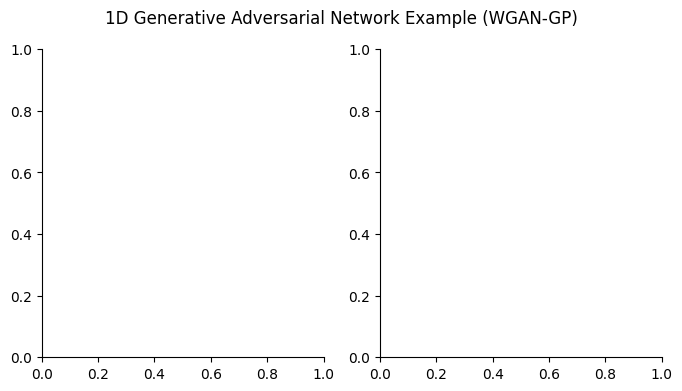

step:    0, negative critic loss:   0.2402, time:   0 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:   50, negative critic loss:   0.2424, time:   1 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  100, negative critic loss:   0.1931, time:   2 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  150, negative critic loss:   0.1202, time:   3 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  200, negative critic loss:  -0.0066, time:   4 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  250, negative critic loss:  -0.0084, time:   5 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  300, negative critic loss:   0.0148, time:   6 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  350, negative critic loss:  -0.0291, time:   7 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  400, negative critic loss:   0.0351, time:   8 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  450, negative critic loss:   0.0107, time:   9 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  500, negative critic loss:  -0.0229, time:  10 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  550, negative critic loss:   0.0380, time:  11 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  600, negative critic loss:  -0.0341, time:  12 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  650, negative critic loss:  -0.0303, time:  12 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  700, negative critic loss:   0.0552, time:  13 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  750, negative critic loss:  -0.0406, time:  14 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  800, negative critic loss:   0.0015, time:  15 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  850, negative critic loss:   0.0049, time:  16 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  900, negative critic loss:   0.0367, time:  17 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step:  950, negative critic loss:   0.0038, time:  18 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1000, negative critic loss:  -0.0345, time:  19 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1050, negative critic loss:  -0.0316, time:  20 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1100, negative critic loss:   0.0437, time:  21 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1150, negative critic loss:   0.0010, time:  22 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1200, negative critic loss:  -0.0251, time:  23 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1250, negative critic loss:  -0.0272, time:  24 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1300, negative critic loss:   0.0106, time:  25 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1350, negative critic loss:  -0.0036, time:  26 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1400, negative critic loss:   0.0153, time:  26 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1450, negative critic loss:   0.0231, time:  27 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1500, negative critic loss:  -0.0409, time:  28 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1550, negative critic loss:  -0.0272, time:  29 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1600, negative critic loss:  -0.0096, time:  30 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1650, negative critic loss:  -0.0084, time:  33 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1700, negative critic loss:  -0.0024, time:  34 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1750, negative critic loss:  -0.0489, time:  35 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1800, negative critic loss:  -0.0125, time:  36 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1850, negative critic loss:   0.0553, time:  37 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1900, negative critic loss:   0.0051, time:  38 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 1950, negative critic loss:  -0.0008, time:  38 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2000, negative critic loss:  -0.0289, time:  39 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2050, negative critic loss:  -0.0403, time:  40 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2100, negative critic loss:  -0.0168, time:  41 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2150, negative critic loss:  -0.0319, time:  42 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2200, negative critic loss:  -0.0619, time:  43 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2250, negative critic loss:   0.0202, time:  44 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2300, negative critic loss:   0.0087, time:  45 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2350, negative critic loss:   0.0181, time:  46 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2400, negative critic loss:   0.0024, time:  47 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2450, negative critic loss:   0.0314, time:  48 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2500, negative critic loss:   0.0060, time:  50 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2550, negative critic loss:   0.0421, time:  51 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2600, negative critic loss:   0.0015, time:  52 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2650, negative critic loss:  -0.0091, time:  53 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2700, negative critic loss:  -0.0001, time:  54 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2750, negative critic loss:   0.0631, time:  54 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2800, negative critic loss:  -0.0326, time:  55 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2850, negative critic loss:  -0.0269, time:  56 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2900, negative critic loss:   0.0427, time:  58 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 2950, negative critic loss:  -0.0085, time:  59 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3000, negative critic loss:  -0.0006, time:  60 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3050, negative critic loss:   0.0187, time:  61 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3100, negative critic loss:  -0.0159, time:  62 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3150, negative critic loss:  -0.0277, time:  63 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3200, negative critic loss:   0.0047, time:  63 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3250, negative critic loss:  -0.0109, time:  64 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3300, negative critic loss:   0.0255, time:  65 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3350, negative critic loss:  -0.0203, time:  66 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3400, negative critic loss:   0.0147, time:  67 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3450, negative critic loss:   0.0244, time:  68 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3500, negative critic loss:  -0.0152, time:  69 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3550, negative critic loss:   0.0347, time:  70 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3600, negative critic loss:   0.0326, time:  72 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3650, negative critic loss:  -0.0037, time:  72 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3700, negative critic loss:  -0.0172, time:  73 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3750, negative critic loss:  -0.0279, time:  74 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3800, negative critic loss:   0.0358, time:  75 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3850, negative critic loss:  -0.0051, time:  76 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3900, negative critic loss:  -0.0006, time:  77 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 3950, negative critic loss:  -0.0001, time:  78 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4000, negative critic loss:  -0.0012, time:  78 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4050, negative critic loss:   0.0174, time:  79 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4100, negative critic loss:  -0.0496, time:  80 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4150, negative critic loss:   0.0174, time:  81 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4200, negative critic loss:   0.0097, time:  82 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4250, negative critic loss:   0.0544, time:  84 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4300, negative critic loss:   0.0005, time:  85 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4350, negative critic loss:  -0.0226, time:  86 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4400, negative critic loss:  -0.0662, time:  86 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4450, negative critic loss:  -0.0530, time:  88 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4500, negative critic loss:   0.0559, time:  88 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4550, negative critic loss:   0.0205, time:  89 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4600, negative critic loss:   0.0063, time:  90 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4650, negative critic loss:   0.0244, time:  91 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4700, negative critic loss:  -0.0606, time:  92 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4750, negative critic loss:  -0.0039, time:  93 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4800, negative critic loss:   0.0350, time:  94 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4850, negative critic loss:   0.0623, time:  95 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4900, negative critic loss:   0.0030, time:  96 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 4950, negative critic loss:   0.0349, time:  97 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5000, negative critic loss:   0.0334, time:  98 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5050, negative critic loss:   0.0575, time:  99 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5100, negative critic loss:  -0.0489, time: 100 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5150, negative critic loss:  -0.0381, time: 101 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5200, negative critic loss:  -0.0059, time: 102 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5250, negative critic loss:   0.0568, time: 103 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5300, negative critic loss:   0.0249, time: 104 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5350, negative critic loss:   0.0800, time: 104 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5400, negative critic loss:   0.0032, time: 105 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5450, negative critic loss:   0.0617, time: 106 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5500, negative critic loss:  -0.0014, time: 107 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5550, negative critic loss:  -0.0148, time: 108 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5600, negative critic loss:   0.0478, time: 110 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5650, negative critic loss:   0.0379, time: 111 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5700, negative critic loss:   0.0093, time: 112 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5750, negative critic loss:  -0.0100, time: 112 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5800, negative critic loss:   0.0470, time: 113 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5850, negative critic loss:  -0.0020, time: 114 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5900, negative critic loss:  -0.0490, time: 115 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 5950, negative critic loss:  -0.0031, time: 116 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6000, negative critic loss:  -0.0200, time: 117 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6050, negative critic loss:  -0.0111, time: 118 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6100, negative critic loss:  -0.0561, time: 119 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6150, negative critic loss:   0.1215, time: 120 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6200, negative critic loss:  -0.0161, time: 121 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6250, negative critic loss:   0.0188, time: 122 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6300, negative critic loss:   0.0563, time: 123 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6350, negative critic loss:   0.0198, time: 124 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6400, negative critic loss:  -0.0558, time: 125 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6450, negative critic loss:  -0.0084, time: 126 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6500, negative critic loss:   0.0185, time: 127 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6550, negative critic loss:   0.0168, time: 128 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6600, negative critic loss:  -0.0266, time: 128 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6650, negative critic loss:  -0.0392, time: 129 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6700, negative critic loss:  -0.0572, time: 130 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6750, negative critic loss:   0.0944, time: 131 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6800, negative critic loss:   0.0465, time: 132 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6850, negative critic loss:  -0.0323, time: 133 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6900, negative critic loss:   0.1088, time: 134 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 6950, negative critic loss:  -0.0171, time: 135 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7000, negative critic loss:   0.0773, time: 136 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7050, negative critic loss:   0.0098, time: 137 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7100, negative critic loss:  -0.0127, time: 138 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7150, negative critic loss:   0.0525, time: 139 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7200, negative critic loss:   0.0588, time: 140 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7250, negative critic loss:   0.0076, time: 141 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7300, negative critic loss:  -0.0169, time: 142 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7350, negative critic loss:   0.0294, time: 143 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7400, negative critic loss:   0.0106, time: 144 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7450, negative critic loss:  -0.0273, time: 145 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7500, negative critic loss:   0.0367, time: 145 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7550, negative critic loss:   0.0185, time: 147 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7600, negative critic loss:   0.0840, time: 148 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7650, negative critic loss:   0.0387, time: 149 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7700, negative critic loss:   0.0134, time: 150 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7750, negative critic loss:   0.0124, time: 152 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7800, negative critic loss:   0.0239, time: 154 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7850, negative critic loss:  -0.0435, time: 155 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7900, negative critic loss:  -0.0270, time: 157 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 7950, negative critic loss:  -0.0147, time: 159 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8000, negative critic loss:   0.0678, time: 162 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8050, negative critic loss:  -0.0524, time: 164 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8100, negative critic loss:  -0.0748, time: 165 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8150, negative critic loss:   0.1094, time: 165 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8200, negative critic loss:   0.0725, time: 166 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8250, negative critic loss:   0.0732, time: 167 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8300, negative critic loss:  -0.0121, time: 168 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8350, negative critic loss:   0.0384, time: 169 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8400, negative critic loss:   0.0111, time: 170 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8450, negative critic loss:  -0.0200, time: 171 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8500, negative critic loss:   0.0146, time: 172 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8550, negative critic loss:   0.0145, time: 173 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8600, negative critic loss:   0.0384, time: 174 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8650, negative critic loss:   0.0099, time: 175 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8700, negative critic loss:  -0.0255, time: 176 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8750, negative critic loss:  -0.0302, time: 177 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8800, negative critic loss:   0.0678, time: 178 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8850, negative critic loss:   0.0392, time: 179 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8900, negative critic loss:   0.0420, time: 180 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 8950, negative critic loss:  -0.0142, time: 181 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9000, negative critic loss:  -0.0401, time: 182 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9050, negative critic loss:  -0.0088, time: 183 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9100, negative critic loss:   0.0007, time: 183 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9150, negative critic loss:   0.0166, time: 184 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9200, negative critic loss:   0.0472, time: 186 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9250, negative critic loss:  -0.0020, time: 187 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9300, negative critic loss:  -0.0436, time: 188 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9350, negative critic loss:   0.0603, time: 189 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9400, negative critic loss:   0.0310, time: 190 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9450, negative critic loss:  -0.0777, time: 190 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9500, negative critic loss:   0.0542, time: 191 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9550, negative critic loss:   0.0179, time: 192 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9600, negative critic loss:   0.0315, time: 193 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9650, negative critic loss:   0.0044, time: 194 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9700, negative critic loss:  -0.0197, time: 195 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9750, negative critic loss:  -0.0449, time: 196 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9800, negative critic loss:   0.0033, time: 197 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9850, negative critic loss:   0.0185, time: 198 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9900, negative critic loss:  -0.0275, time: 199 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 9950, negative critic loss:   0.0096, time: 201 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


step: 10000, negative critic loss:  -0.0115, time: 201 s


<ipython-input-2-574068bb8da8>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d.flatten(), shade=True, ax=self.ax2, label='Real data')
<ipython-input-2-574068bb8da8>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g.flatten(), shade=True, ax=self.ax2, label='Generated data')


In [3]:
Gaussian_out = True
mu = 0.5
sigma = 1.5

Uniform_out = False
left_v = -1.
right_v = 4.

Discrete_out = False
dis_v_list = [-3., 1.5, 3.2]  # discrete values as a list
dis_p_list = [0.3, 0.5, 0.2]   # probabilities for the discrete values

seed = 100  # Fix the random seed
n_step = 10000  # Run the training procedure for 1450 steps.

savepath = ''  # the directory and the file name to save the generated pdf during training
file_name = 'Gaussian_pdf.gif'
data = Dataset(Gaussian_out, mu, sigma, Uniform_out, left_v, right_v, Discrete_out, dis_v_list, dis_p_list, seed)  # Initialize the toy data object.
vis = Visualization(path = savepath, name = file_name, save_animation=True)  # Create the visualization and optionally save the resulting animation.
model = GAN(n_step=n_step, callback=vis.plot_progress, seed=seed).fit(data)  # Fit the data and plot the progress.
